### SIDDHARTH SHARMA(E20CSE283)
### ISHAAN RAJENDRA GAWARE(E20CSE422)
### RISHABH KHANDELWAL(E20CSE363)

In [195]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns

In [196]:
usecols_anime = ['MAL_ID', 'Name','Japanese name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered', 'Ranked', 'Popularity', 'Studios', 'Source']
anime = pd.read_csv("anime.csv", usecols = usecols_anime)

In [197]:
anime.shape

(17562, 13)

In [198]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Aired,Premiered,Studios,Source,Ranked,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,28.0,39
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"Sep 1, 2001",Unknown,Bones,Original,159.0,518
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,266.0,201
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,2481.0,1467
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,3710.0,4369


In [199]:
anime.info

<bound method DataFrame.info of        MAL_ID                             Name    Score  \
0           1                     Cowboy Bebop     8.78   
1           5  Cowboy Bebop: Tengoku no Tobira     8.39   
2           6                           Trigun     8.24   
3           7               Witch Hunter Robin     7.27   
4           8                   Bouken Ou Beet     6.98   
...       ...                              ...      ...   
17557   48481  Daomu Biji Zhi Qinling Shen Shu  Unknown   
17558   48483                     Mieruko-chan  Unknown   
17559   48488  Higurashi no Naku Koro ni Sotsu  Unknown   
17560   48491      Yama no Susume: Next Summit  Unknown   
17561   48492                    Scarlet Nexus  Unknown   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Myst

## Data preperation and cleaning

In [200]:
anime.drop(anime[anime['Popularity']>5000].index, inplace = True)
anime.shape

(5006, 13)

In [201]:
jp_title = anime['Japanese name']
anime['English name'] = np.where((anime['English name'] == 'Unknown'),
                                 anime['Japanese name'],
                                 anime['English name'])
anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Aired,Premiered,Studios,Source,Ranked,Popularity
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,28.0,39
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,"Sep 1, 2001",Unknown,Bones,Original,159.0,518
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,266.0,201
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,2481.0,1467
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,3710.0,4369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,48413,Hataraku Maou-sama! 2nd Season,Unknown,"Comedy, Demons, Supernatural, Romance, Fantasy",はたらく魔王さま！,はたらく魔王さま！,TV,Unknown,Unknown,Unknown,Light novel,Unknown,1833
17543,48417,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Unknown,"Magic, Fantasy, School",魔王学院の不適合者 ～史上最強の魔王の始祖、転生して子孫たちの学校へ通う～,魔王学院の不適合者 ～史上最強の魔王の始祖、転生して子孫たちの学校へ通う～,TV,Unknown,Unknown,SILVER LINK.,Light novel,Unknown,2597
17548,48427,"The Sun, Moon and Stars",Unknown,Music,Unknown,Unknown,Music,"Jan 18, 2021",Unknown,Unknown,Other,0.0,0
17549,48438,Mahoutsukai no Yome: Nishi no Shounen to Seira...,Unknown,"Slice of Life, Magic, Fantasy, Shounen",魔法使いの嫁 西の少年と青嵐の騎士,魔法使いの嫁 西の少年と青嵐の騎士,OVA,"Sep 10, 2021 to ?",Unknown,Studio Kafka,Manga,Unknown,4546


In [202]:
anime['Score'] = anime['Score'].replace('Unknown', np.NaN)
anime['Score'] = anime['Score'].astype(float)
score_mean = anime["Score"].mean()
score_mean

7.147445984508764

In [203]:
anime["Score"].fillna(score_mean, inplace = True)
anime["Score"].value_counts()

7.147446    100
7.290000     40
7.130000     40
7.340000     39
7.280000     38
           ... 
5.160000      1
4.510000      1
2.350000      1
8.660000      1
3.840000      1
Name: Score, Length: 410, dtype: int64

## Data analysis and visualization

In [204]:
def split_labels(series):
    series = series.split(",")
    if "Unknown" in series:
        series.remove("Unknown")
    return series

anime["Genres"] = anime["Genres"].map(split_labels)


In [205]:
def encode(genre_list, genres_present):
    full = {i:0 for i in genre_list}
    for i in genres_present:
        full[i] += 1
    return full

genres = []

for i in anime["Genres"]:
    for j in i:
        genres.append(j.strip())

genres = encode(genres, genres)
genres = sorted(genres.items(), key=lambda x:x[1], reverse=True)
genres = dict(genres)
genres

{'Comedy': 2327,
 'Action': 1812,
 'Fantasy': 1236,
 'Drama': 1200,
 'Romance': 1157,
 'Shounen': 1124,
 'Adventure': 1007,
 'School': 994,
 'Sci-Fi': 985,
 'Supernatural': 887,
 'Slice of Life': 750,
 'Ecchi': 515,
 'Magic': 502,
 'Seinen': 451,
 'Mystery': 435,
 'Mecha': 368,
 'Super Power': 349,
 'Harem': 317,
 'Military': 293,
 'Historical': 281,
 'Shoujo': 270,
 'Sports': 261,
 'Psychological': 236,
 'Demons': 223,
 'Music': 208,
 'Horror': 197,
 'Parody': 177,
 'Space': 159,
 'Martial Arts': 158,
 'Hentai': 158,
 'Game': 143,
 'Police': 122,
 'Vampire': 101,
 'Kids': 91,
 'Thriller': 86,
 'Samurai': 81,
 'Shoujo Ai': 68,
 'Josei': 66,
 'Shounen Ai': 58,
 'Dementia': 40,
 'Yaoi': 30,
 'Cars': 20,
 'Yuri': 7}

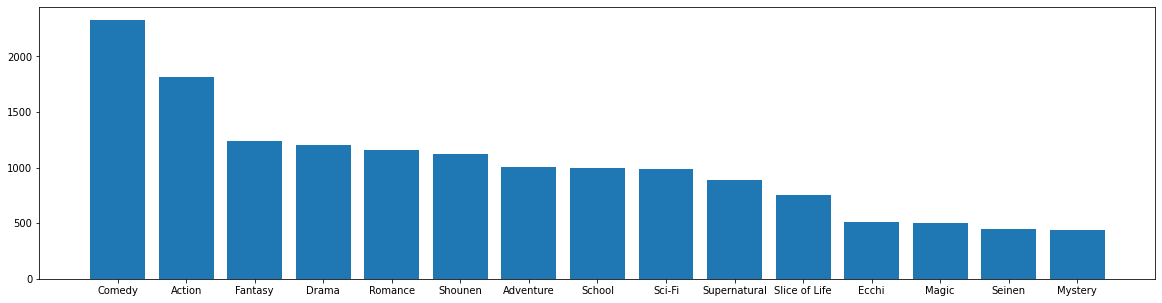

In [206]:
fig = plt.figure(figsize = (20,5))
plt.bar(list(genres.keys())[:15], list(genres.values())[:15])
plt.show()

In [207]:
def encode(types_list, types_present):
    full = {i:0 for i in types_list}
    for i in types_present:
        full[i] += 1
    return full

types = []

for i in anime["Type"]:
    types.append(i)

types = encode(types, types)
types = sorted(types.items(), key=lambda x:x[1], reverse=True)
types = dict(types)
types

{'TV': 2589,
 'OVA': 827,
 'Movie': 705,
 'Special': 612,
 'ONA': 236,
 'Music': 29,
 'Unknown': 8}

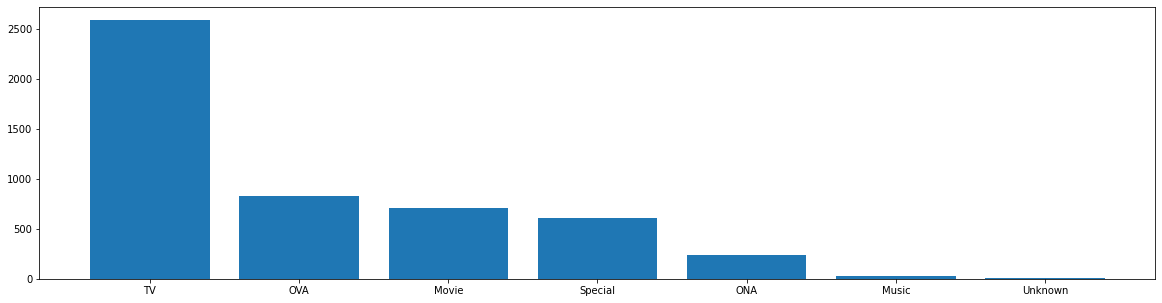

In [208]:
fig = plt.figure(figsize = (20,5))
plt.bar(list(types.keys()), list(types.values()))
plt.show()

In [209]:
def encode(source_list, source_present):
    full = {i:0 for i in source_list}
    for i in source_present:
        full[i] += 1
    return full

source = []

for i in anime["Source"]:
    source.append(i)

source = encode(source, source)
source = sorted(source.items(), key=lambda x:x[1], reverse=True)
source = dict(source)
source

{'Manga': 2061,
 'Original': 957,
 'Light novel': 630,
 'Visual novel': 322,
 'Game': 317,
 'Novel': 160,
 '4-koma manga': 150,
 'Web manga': 126,
 'Unknown': 122,
 'Other': 98,
 'Music': 23,
 'Card game': 20,
 'Book': 13,
 'Digital manga': 4,
 'Picture book': 3}

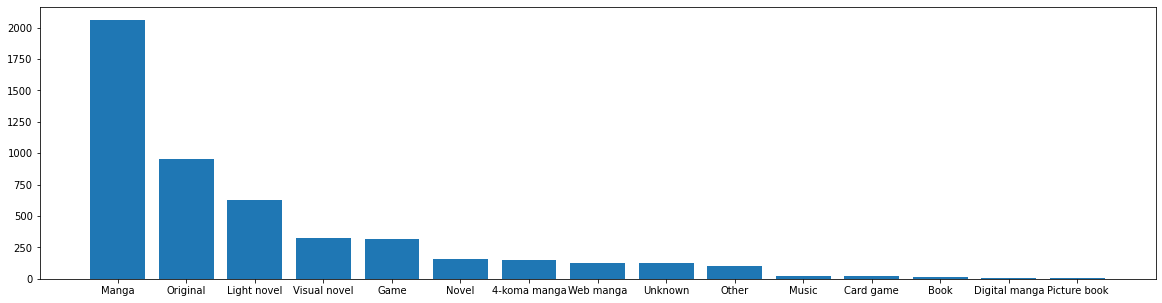

In [210]:
fig = plt.figure(figsize = (20,5))
plt.bar(list(source.keys()), list(source.values()))
plt.show()

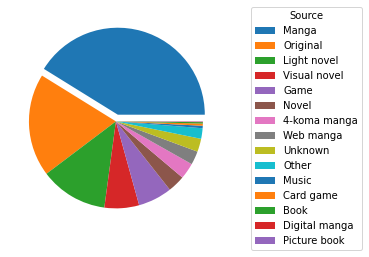

In [211]:
plt.pie(list(source.values()), explode = [0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.legend(source, title = "Source", bbox_to_anchor=(1.1, 1.05))
plt.show()

In [212]:
anime['Premiered'] = anime['Premiered'].replace('Unknown', np.nan)
anime['Premiered'].value_counts()

Fall 2016      54
Spring 2018    52
Spring 2016    48
Fall 2018      47
Summer 2016    45
               ..
Spring 1970     1
Winter 1985     1
Spring 1983     1
Fall 1976       1
Fall 2021       1
Name: Premiered, Length: 160, dtype: int64

In [213]:
def extract_year(series):
    if series != 'Unknown':
        m = re.search(r'[0-9]{4}', series)
        return m.group()
    else:
        return 0
    
anime['Aired'] = anime['Aired'].map(extract_year).astype(int)
anime['Aired'].value_counts()

2016    337
2018    318
2014    317
2017    309
2015    294
2013    287
2012    282
2011    254
2019    248
2010    210
2020    207
2009    206
2008    203
2007    182
2006    172
2005    146
2004    123
2003    107
2021    106
2002     92
2001     76
2000     56
1999     53
1998     50
1995     40
1994     35
0        34
1996     33
1997     32
1993     27
1992     22
1988     19
1989     16
1987     14
1990     13
1991     13
1986     10
1985      9
1981      6
1983      6
1979      6
1984      5
1978      5
1982      5
2022      4
1973      3
1980      3
1972      2
1974      2
1977      2
1976      1
1970      1
1969      1
1967      1
1971      1
Name: Aired, dtype: int64

# QUESTION 1:
### Show the progress of the industry over the years. What can you conclude from the following statistics?

In [214]:
anime_yearly = pd.DataFrame(anime.groupby('Aired').count()['MAL_ID']).reset_index()
anime_yearly = anime_yearly.drop(index=0)
anime_yearly.head()

,Aired,MAL_ID
1,1967,1
2,1969,1
3,1970,1
4,1971,1
5,1972,2


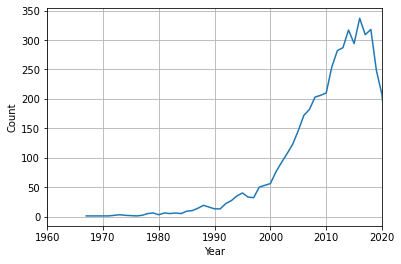

In [215]:
anime_yearly = anime_yearly.sort_values('Aired')
plt.plot(anime_yearly['Aired'], anime_yearly['MAL_ID'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.xlim(1960, 2020)
plt.grid(True)
plt.show()

As seen in the graph, we compared the growth of the anime industry, which began in the early 1970s. Here, you can see that the anime industry started growing at a very slow pace but gradually started gaining traction after the 2000 century. Anime has been very impactful in the past few decades on society, resulting in the growth of the industry in all aspects. From this graph, we conclude that anime would continue to explode as a means of entertainment as more and more people get attracted.

# QUESTION 2:
### Which studio has a higher mean score?

In [216]:
# def split_labels(series):
#     series = series.split(",")
#     if "Unknown" in series:
#         series.remove("Unknown")
#     return series

# anime["Studios"] = anime["Studios"].map(split_labels)

# def encode(studio_list, studio_present):
#     full = {i:0 for i in studio_list}
#     for i in studio_present:
#         full[i] += 1
#     return full

# studio = []

# for i in anime["Studios"]:
#     for j in i:
#         studio.append(j.strip())

# studio = encode(studio, studio)
# studio = sorted(studio.items(), key=lambda x:x[1], reverse=True)
# studio = dict(studio)
# studio

In [217]:
# anime_studio = pd.DataFrame(list(studio.items()), columns  = ["Studio", "Count"])
# anime_studio

In [218]:
anime_studio = anime[anime['Studios'].map(anime['Studios'].value_counts()) > 10]
studio = dict(anime_studio.groupby(by=['Studios'])["Score"].mean())
print(max(studio, key=studio.get))
max(studio.values())

Bandai Namco Pictures


8.117495844962212

In [219]:
studio = OrderedDict(sorted(studio.items(),key=lambda x: x[1], reverse=True))
studio

OrderedDict([('Bandai Namco Pictures', 8.117495844962212),
             ('Studio Ghibli', 7.932608695652173),
             ('Tokyo Movie Shinsha', 7.852857142857142),
             ('Shuka', 7.8004653740317975),
             ('Wit Studio', 7.715588235294117),
             ('SynergySP', 7.7),
             ('Nippon Animation', 7.641304347826087),
             ('White Fox', 7.5996875),
             ('CloverWorks', 7.557777777777777),
             ('Kyoto Animation', 7.5287614521423825),
             ('Production I.G', 7.521256757475318),
             ('Shaft', 7.511954022988506),
             ('Bones', 7.502310301594505),
             ('AIC ASTA', 7.488571428571428),
             ('ufotable', 7.462711616691676),
             ('Sunrise', 7.459184786342795),
             ('TMS Entertainment', 7.431076654905324),
             ('Artland', 7.42625),
             ('CoMix Wave Films', 7.401875),
             ('David Production', 7.3990322580645165),
             ('Madhouse', 7.377837837837839),
 

In [220]:
len(studio)

86

[Text(0.5, 1.0, 'Descending order of studios scores')]

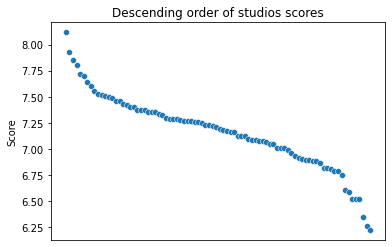

In [221]:
studio_plot = sns.scatterplot(x=studio.keys(), y=studio.values(), data=studio)
studio_plot.set(xticklabels=[]) 
studio_plot.set(ylabel='Score')
studio_plot.tick_params(bottom=False)
studio_plot.set(title='Descending order of studios scores')

We performed analysis on separate studios. Also, to further sort the irrelevant data, we only performed analysis on studios with total projects > 10.

From the analysis we performed, **Bandai Namco Pictures** came out the winner with the highest score of **8.117** among 86 other studios with over ten projects.

Also, from the scatterplot, we can see that the best studio(i.e Bandai Namco Pictures) has a high lead over other studios. Also, we can see the density of studios increasing as we move towards the mean score. And then further decreasing as we move away from the mean.

# QUESTION 3:
### Show a **Score Band** for the dataset with the help of graphs.

In [222]:
anime_score_band = anime.copy()
anime_score_band['Score_band'] = 0
anime_score_band.loc[(anime_score_band['Score'] > 9.0) & (anime_score_band['Score'] <=10.0), 'Score_band'] = '9 - 10'
anime_score_band.loc[(anime_score_band['Score'] > 8.0) & (anime_score_band['Score'] <=9.0), 'Score_band'] = '8 - 9'
anime_score_band.loc[(anime_score_band['Score'] > 7.0) & (anime_score_band['Score'] <=8.0), 'Score_band'] = '7 - 8'
anime_score_band.loc[(anime_score_band['Score'] > 6.0) & (anime_score_band['Score'] <=7.0), 'Score_band'] = '6 - 7'
anime_score_band.loc[(anime_score_band['Score'] > 5.0) & (anime_score_band['Score'] <=6.0), 'Score_band'] = '5 - 6'
anime_score_band.loc[(anime_score_band['Score'] > 4.0) & (anime_score_band['Score'] <=5.0), 'Score_band'] = '4 - 5'
anime_score_band.loc[(anime_score_band['Score'] > 3.0) & (anime_score_band['Score'] <=4.0), 'Score_band'] = '3 - 4'
anime_score_band.loc[(anime_score_band['Score'] > 2.0) & (anime_score_band['Score'] <=3.0), 'Score_band'] = '2 - 3'
anime_score_band.loc[(anime_score_band['Score'] > 1.0) & (anime_score_band['Score'] <=2.0), 'Score_band'] = '1 - 2'
anime_score_band.loc[(anime_score_band['Score'] >= 0.0) & (anime_score_band['Score'] <=1.0), 'Score_band'] = '0 - 1'

In [223]:
anime_score_band.Score_band.value_counts().to_frame().style.background_gradient(cmap='Blues')

,Score_band
7 - 8,2594
6 - 7,1603
8 - 9,516
5 - 6,244
4 - 5,29
9 - 10,9
2 - 3,5
3 - 4,5
1 - 2,1


In [224]:
anime_score_band.Score_band.value_counts(normalize = True).to_frame().style.background_gradient(cmap='Blues')

,Score_band
7 - 8,0.518178
6 - 7,0.320216
8 - 9,0.103076
5 - 6,0.048742
4 - 5,0.005793
9 - 10,0.001798
2 - 3,0.000999
3 - 4,0.000999
1 - 2,0.000200


In [225]:
anime_score_band.Score_band.value_counts(normalize = True)[:2].sum()

0.8383939272872553

In [226]:
pd.crosstab(anime_score_band.Score_band,anime['Studios'],margins=True).style.background_gradient(cmap='Blues')

From the score band, we found out that **over 50%** of the animes have a score between 7-8, which is quite high.
Also, the score between 6-8 is over **83%**, which was expected as the mean is also between this range.

We have also plotted a table for a detailed analysis of each studio and its score band.

# QUESTION 4:
### Compare different types of animes.

In [227]:
anime['Type'].value_counts()

TV         2589
OVA         827
Movie       705
Special     612
ONA         236
Music        29
Unknown       8
Name: Type, dtype: int64

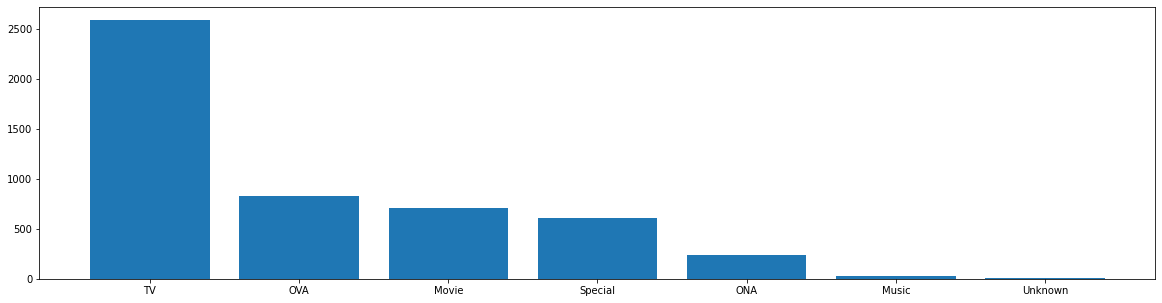

In [228]:
fig = plt.figure(figsize = (20,5))
plt.bar(list(types.keys()), list(types.values()))
plt.show()

In [229]:
type_dict = dict(anime.groupby(by=['Type'])["Score"].mean())
type_dict

{'Movie': 7.4358744307881794,
 'Music': 7.287842964983061,
 'ONA': 6.88988187242187,
 'OVA': 7.040658616574429,
 'Special': 7.043333333333334,
 'TV': 7.149532372764008,
 'Unknown': 7.147445984508764}

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Score'>

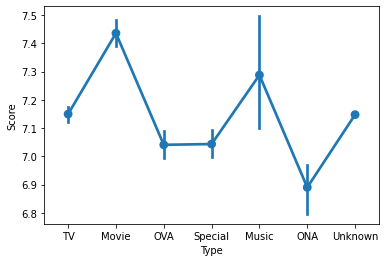

In [230]:
sns.pointplot('Type','Score', data=anime)

When an anime studio works on a project, they have a choice to either make their series in a movie format or a weekly episode format or make specials for an already ongoing anime. They even make animes revolving around the music industry or the gaming industry. So taking all this data, we compared how well these different types of anime formats do on a scoreboard and compared them on a point plot graph. Here you can analyze that most of the TV(weekly format) animes are averaging **7.149** while movies are doing relatively well, with an average score of **7.435**. But as you see that the music type is averaging **7.287**.

## Conclusion
We performed various analysis and visualization of the **anime dataset** to derive several conclusions regarding scores, studios, genres, types, etc. To find out the preferences of people around the world. Also, this analysis is useful for the anime industry to regulate their score, popularity, growth, etc.

## Future work
This research can be used along with some other similar datasets like *synopsis dataset* to make a recommendation system that will recommend similar animes based on genres, synopsis, etc. 

Also customized user recommendation system can be developed by using *this research* and *user anime list dataset*. It can recommend animes based on the user watch list and users scores, favorite genres, studios, etc.